<a href="https://colab.research.google.com/github/rmaacario/Processamento-de-Linguagem-Natural-em-Portugues-com-Redes-Neurais-I/blob/main/NN_%26_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.12.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [5]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [6]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [4]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([  
    keras.Input(shape=(1,)), # Camada de entrada com uma dimensão de entrada
    keras.layers.Dense(units=1), #Camada de saída com uma unidade, sem função de ativação
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 [==============================] - 2s 17ms/step - loss: 1408.8486
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 2.6889
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 2.5860
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 2.4102
Epoch 5/300
4/4 [==============================] - 0s 13ms/step - loss: 2.3744
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 2.2414
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 2.1665
Epoch 8/300
4/4 [==============================] - 0s 10ms/step - loss: 2.1011
Epoch 9/300
4/4 [==============================] - 0s 12ms/step - loss: 2.0434
Epoch 10/300
4/4 [==============================] - 0s 11ms/step - loss: 1.8976
Epoch 11/300
4/4 [==============================] - 0s 10ms/step - loss: 1.8799
Epoch 12/300
4/4 [==============================] - 0s 13ms/step - loss: 1.7505
Epoch 13/300
4/4 [============================

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

1/1 [==============================] - 0s 125ms/step
prediction: [[175.01222]]      real value: 175


In [9]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 [==============================] - 0s 8ms/step - loss: 1.5015e-05


1.501511360402219e-05

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [10]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [11]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [19]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)), # Camada de entrada com 1 dimensão de entrada
    #Seu código aqui
    keras.layers.Dense(units=1), # Camada de saída com 1 unidade, sem função de ativação
])


model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 3ms/step - loss: 10.3280
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 10.1565
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 9.9923
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 9.8274
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 9.6735
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 9.5164
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 9.3626
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 9.2026
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 9.0505
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 8.8932
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 8.7360
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 8.5859
Epoch 13/400
4/4 [==============================] - 0s 4ms/

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [22]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 7ms/step - loss: 0.0495


0.049478642642498016

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica




RSP: Diferentes funções de ativação podem afetar significativamente o desempenho de uma rede neural. Algumas funções de ativação populares incluem a função sigmoide, a função tanh e a função ReLU. A função sigmoide pode apresentar problemas de gradiente desvanecente, enquanto a função tanh pode ajudar a evitar problemas de deslocamento de gradiente em redes profundas. A função ReLU é amplamente utilizada em redes neurais profundas devido à sua eficiência computacional, mas também pode apresentar problemas de "dying ReLU". Escolher a função de ativação correta para um problema específico depende das características dos dados e da arquitetura da rede.

In [29]:
#Definindo uma sequência de camadas usando a classe Sequential do Keras

model = tf.keras.Sequential([    
    keras.Input(shape=(1,)), # Camada de entrada com 1 dimensão de entrada
    keras.layers.Dense(units=10, activation="relu"), # Camada oculta com 10 unidades e função de ativação ReLU
    keras.layers.Dense(units=1), # Camada de saída com 1 unidade, sem função de ativação
])


#Compila o modelo com o otimizador Adam e a função de custo de erro quadrático médio (mean_squared_error)
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400) #Ajusta o modelo aos dados de entrada x e rótulos y por 400 épocas

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 2.2631
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 1.9369
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 1.6264
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 1.3564
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 1.1096
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.8868
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7044
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.5327
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.4042
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2956
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2098
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1484
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [30]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)), # Camada de entrada com 1 dimensão de entrada
    keras.layers.Dense(units=10, activation="sigmoid"), # Camada oculta com 10 unidades e função de ativação sigmoidal
    keras.layers.Dense(units=1), # Camada de saída com 1 unidade, sem função de ativação
])


model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 1.5747
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 1.4817
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 1.3959
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 1.3104
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 1.2308
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 1.1533
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 1.0803
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 1.0105
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.9430
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.8795
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.8197
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7618
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [31]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)), # Camada de entrada com 1 dimensão de entrada
    keras.layers.Dense(units=10, activation="tanh"), # Camada oculta com 10 unidades e função de ativação tangente hiperbólica (tanh)
    keras.layers.Dense(units=1), # Camada de saída com 1 unidade, sem função de ativação
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400) 

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 0.1441
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 0.1067
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0766
Epoch 4/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 7/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 10/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 13/400
4/4 [==============================] - 0s 4ms/st


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop



**RSP: Diferentes funções de otimização podem afetar o desempenho de uma rede neural durante o treinamento. O SGD é uma técnica simples e popular, enquanto o RMSprop é mais avançado e utiliza uma média móvel ponderada dos gradientes anteriores para ajustar a taxa de aprendizagem. A escolha da função de otimização depende do problema específico, da arquitetura da rede e das características dos dados.**

In [32]:
# Testando a função de otimização SGD
model_sgd = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=1)
])

model_sgd.compile(optimizer="sgd", loss="mean_squared_error")
model_sgd.fit(x, y, epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 9/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [33]:
# Testando a função de otimização RMSprop
model_rmsprop = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=1)
])

model_rmsprop.compile(optimizer="rmsprop", loss="mean_squared_error")
model_rmsprop.fit(x, y, epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 1.2054
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 1.0164
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 0.8906
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.8104
Epoch 5/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7306
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6620
Epoch 7/400
4/4 [==============================] - 0s 5ms/step - loss: 0.5911
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5253
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4622
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4097
Epoch 11/400
4/4 [==============================] - 0s 3ms/step - loss: 0.3604
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.3136
Epoch 13/400
4/4 [==============================] - 0s 3ms/st

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?



In [34]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([  
    keras.Input(shape=(1,)), # Camada de entrada com uma dimensão de entrada
    keras.layers.Dense(units=1), #Camada de saída com uma unidade, sem função de ativação
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 3719.0049
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 3715.7380
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 3712.6760
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 3709.4053
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 3706.3367
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 3703.2810
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 3700.1711
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 3696.9985
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 3693.7791
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 3690.6626
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 3687.4866
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 3684.3406
Epoch 13/300
4/4 [=======

**OBS: A função de otimização `Adam` não é adequada para um Perceptron de uma única camada, pois este modelo possui apenas uma camada sem unidades ocultas, o que significa que não há parâmetros a serem otimizados além dos pesos e dos viés da camada única. A função de otimização Adam requer gradientes de segunda ordem para calcular sua taxa de aprendizado adaptativa, o que não é necessário nem possível em um Perceptron de uma única camada.**

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [40]:
# Seu código aqui

x_extrap = np.array([-5, 15, 20, 25, 30])
y_extrap = model.predict(x_extrap)

1/1 [==============================] - 0s 37ms/step


In [41]:
y_extrap

array([[-5.585928],
       [21.359196],
       [28.095476],
       [34.831757],
       [41.56804 ]], dtype=float32)

**RSP: Ao realizarmos a avaliação de performance do modelo com pontos fora do intervalo [0, 10], estamos testando a capacidade da rede neural em realizar uma *extrapolação*, ou seja, estimar valores para pontos que estão fora do intervalo de treinamento. Em geral, é esperado que a performance do modelo seja pior para pontos fora do intervalo de treinamento, uma vez que a rede neural não foi treinada com esses pontos e pode não ter aprendido padrões que sejam relevantes para estimar valores fora do intervalo de treinamento.**

# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow. 

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [42]:
!mkdir data

In [43]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  25.4M      0 --:--:-- --:--:-- --:--:-- 25.4M


Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados. 

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*. 



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




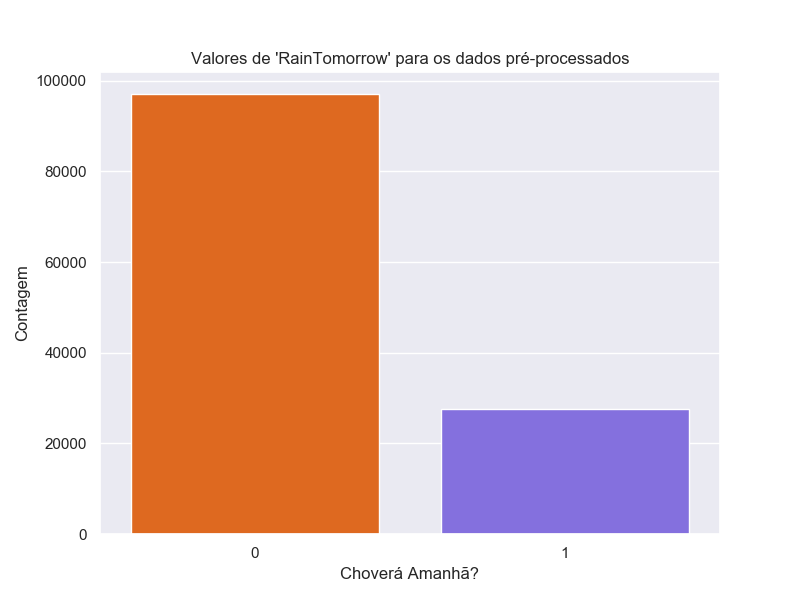



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado. 

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [44]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [ ]:
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui

    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui
    
    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui
    
    return x_train, x_val, y_train, y_val


In [ ]:
df = load_data()
df = pre_processing(df)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [ ]:
# Seu código aqui